In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read
X = pd.read_csv('linearX.csv', header=None).squeeze().values
Y = pd.read_csv('linearY.csv', header=None).squeeze().values
#normalise
X = (X - np.mean(X)) / np.std(X)
Y = (Y - np.mean(Y)) / np.std(Y)
m = 0
b = 0
lr = 0.05 #change as needed
num_iterations = 5000
tolerance = 0.000001
n = len(X) #data points

def compute_cost(X, Y, m, b):
    return np.sum((Y - (m * X + b))**2) / (2 * n)

In [114]:
"""
1. Use linear regression to fit a straight line to the given
database. Set your learning rate to 0.5. What are the cost
function value and learning parameters values after
convergence? Also, mention the convergence criteria you used.
"""
for i in range(num_iterations):
    Y_pred = m * X + b
    D_m = (-1/n) * np.sum(X * (Y - Y_pred))
    D_b = (-1/n) * np.sum(Y - Y_pred)
    
    m -= lr * D_m
    b -= lr * D_b
    
    cost = compute_cost(X, Y, m, b)
    
    if i > 0 and abs(prev_cost - cost) < tolerance:
        print(f'Convergence achieved at iteration {i}')
        break
    
    prev_cost = cost

print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")
print(f"Final cost: {cost}")


Convergence achieved at iteration 106
Final slope (m): 0.001334654942735276
Final intercept (b): 0.9924995479184963
Final cost: 9.684279890936427e-06


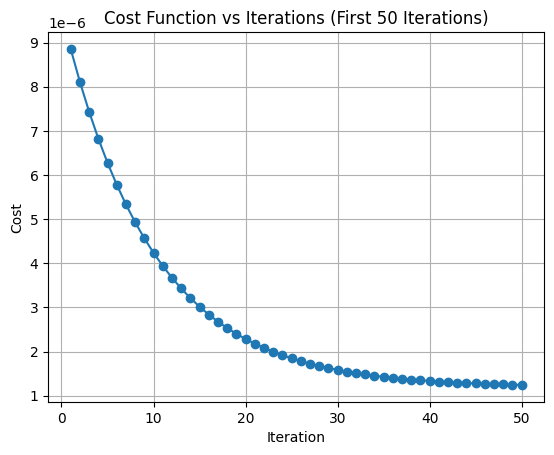

In [115]:
"""
3. Plot cost function v/s iteration graph for the model in
question 1 for first 50 iterations.
"""
cost_history = []
for i in range(50):
    Y_pred = m * X + b
    D_m = (-1/n) * np.sum(X * (Y - Y_pred))
    D_b = (-1/n) * np.sum(Y - Y_pred)
    
    m -= lr * D_m
    b -= lr * D_b
    
    cost = compute_cost(X, Y, m, b)
    cost_history.append(cost)

plt.plot(range(1, 50 + 1), cost_history, marker='o')
plt.title('Cost Function vs Iterations (First 50 Iterations)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


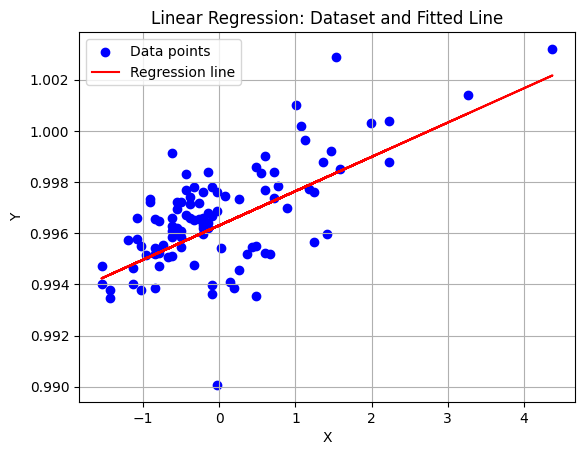

Final slope (m): 0.0013397696605724127
Final intercept (b): 0.996303044221962


In [116]:
"""
4. Plot the given dataset on a graph and also print the straight
line you obtained in question 1 to show how it fits the data.
"""
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, m * X + b, color='red', label='Regression line')
plt.title('Linear Regression: Dataset and Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")


In [117]:
# Gradient Descent function
def gradient_descent(X, Y, lr, num_iterations=50):
    m = 0
    b = 0
    n = len(X)
    cost_history = []
    
    for i in range(num_iterations):
        Y_pred = m * X + b
        D_m = (-1/n) * np.sum(X * (Y - Y_pred))
        D_b = (-1/n) * np.sum(Y - Y_pred)
        
        m -= lr * D_m
        b -= lr * D_b
        
        cost = compute_cost(X, Y, m, b)
        cost_history.append(cost)
    
    return cost_history

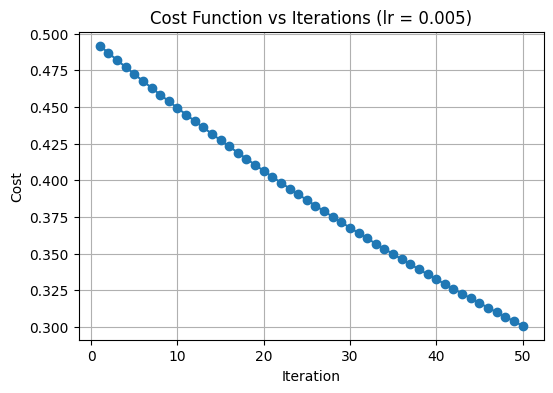

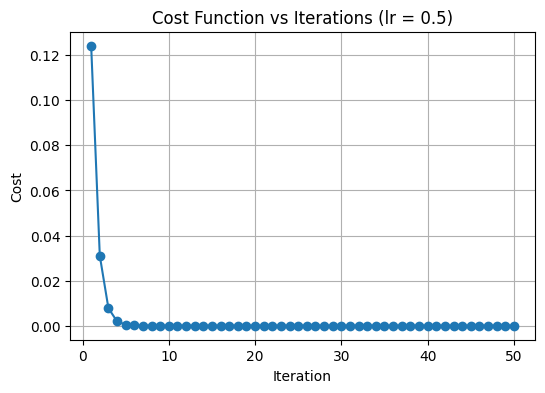

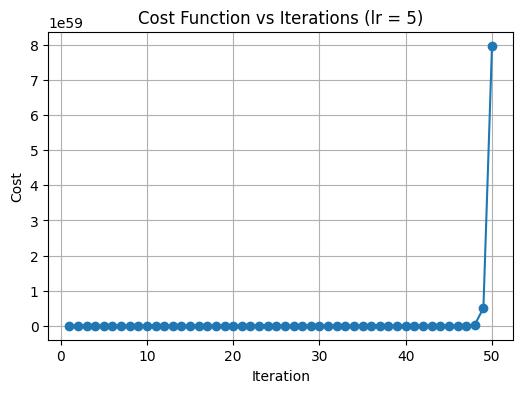

In [118]:
"""
5. Test your regression model with the learning rates
lr = 0.005, lr = 0.5, lr = 5
For each learning rate, plot a graph showing how the cost
function changes for the first 50 iterations and write your
observation.
"""
# Learning rates to test
lrs = [0.005, 0.5, 5]

# Generate three separate plots
for i, lr in enumerate(lrs):
    cost_history = gradient_descent(X, Y, lr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, 51), cost_history, marker='o')
    plt.title(f'Cost Function vs Iterations (lr = {lr})')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()


In [119]:
"""
6. Choose a suitable learning rate, then implement stochastic and
min-batch gradient descent, plot the cost function against
iteration, and observe how your cost function changes compared
to batch gradient descent.

All function definations below
"""
def batch_gradient_descent(X, Y, lr, num_iterations=50):
    m = 0
    b = 0
    n = len(X)
    cost_history = []
    
    for i in range(num_iterations):
        Y_pred = m * X + b
        D_m = (-1/n) * np.sum(X * (Y - Y_pred))
        D_b = (-1/n) * np.sum(Y - Y_pred)
        
        m -= lr * D_m
        b -= lr * D_b
        
        cost = compute_cost(X, Y, m, b)
        cost_history.append(cost)
    
    return cost_history

def stochastic_gradient_descent(X, Y, lr, num_iterations=50):
    m = 0
    b = 0
    cost_history = []
    
    for i in range(num_iterations):
        for j in range(len(X)):
            Y_pred = m * X[j] + b
            D_m = (-2) * X[j] * (Y[j] - Y_pred)
            D_b = (-2) * (Y[j] - Y_pred)
            
            m -= lr * D_m
            b -= lr * D_b
        
        cost = compute_cost(X, Y, m, b)
        cost_history.append(cost)
    
    return cost_history

def mini_batch_gradient_descent(X, Y, lr, batch_size=32, num_iterations=50):
    m = 0
    b = 0
    n = len(X)
    cost_history = []
    
    for i in range(num_iterations):
        indices = np.random.permutation(n)
        for j in range(0, n, batch_size):
            batch_indices = indices[j:j+batch_size]
            X_batch = X[batch_indices]
            Y_batch = Y[batch_indices]
            
            Y_pred = m * X_batch + b
            D_m = (-1/len(X_batch)) * np.sum(X_batch * (Y_batch - Y_pred))
            D_b = (-1/len(X_batch)) * np.sum(Y_batch - Y_pred)
            
            m -= lr * D_m
            b -= lr * D_b
        
        cost = compute_cost(X, Y, m, b)
        cost_history.append(cost)
    
    return cost_history

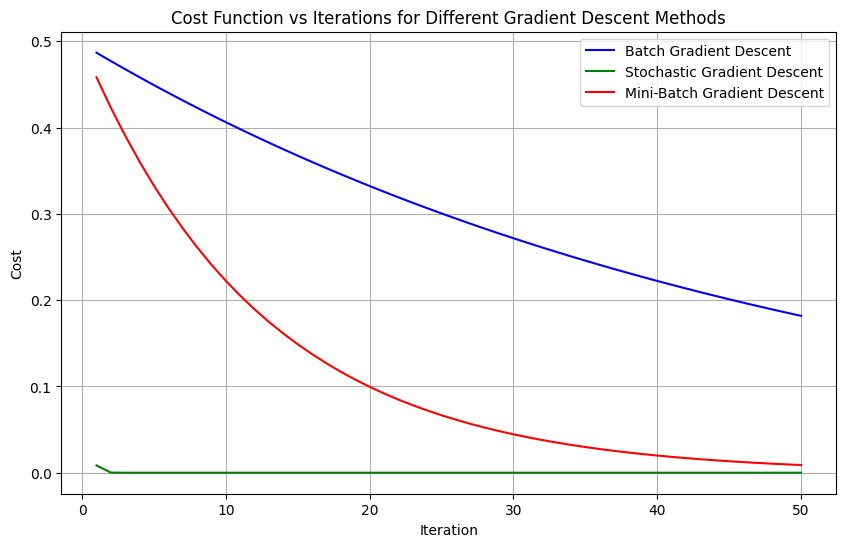

In [120]:
lr = 0.01

batch_cost_history = batch_gradient_descent(X, Y, lr)
sgd_cost_history = stochastic_gradient_descent(X, Y, lr)
mini_batch_cost_history = mini_batch_gradient_descent(X, Y, lr, batch_size=32)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(batch_cost_history) + 1), batch_cost_history, label='Batch Gradient Descent', color='blue')
plt.plot(range(1, len(sgd_cost_history) + 1), sgd_cost_history, label='Stochastic Gradient Descent', color='green')
plt.plot(range(1, len(mini_batch_cost_history) + 1), mini_batch_cost_history, label='Mini-Batch Gradient Descent', color='red')

plt.title('Cost Function vs Iterations for Different Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()
